In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics



In [5]:
# 1. Đọc và khám phá dữ liệu
df = pd.read_excel('data_slr.xlsx', sheet_name="data")
print("Một số dòng đầu tiên của dữ liệu:")
df



Một số dòng đầu tiên của dữ liệu:


,TimeAds,ProfitRate
0,0.5,1
1,2.0,2
2,4.0,7
3,5.0,8
4,3.0,5
5,6.0,8
6,7.0,9
7,9.0,12
8,8.0,10
9,1.0,3


In [6]:
print("\nThông tin cơ bản về dataset:")
print(df.info())



Thông tin cơ bản về dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TimeAds     10 non-null     float64
 1   ProfitRate  10 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 292.0 bytes
None


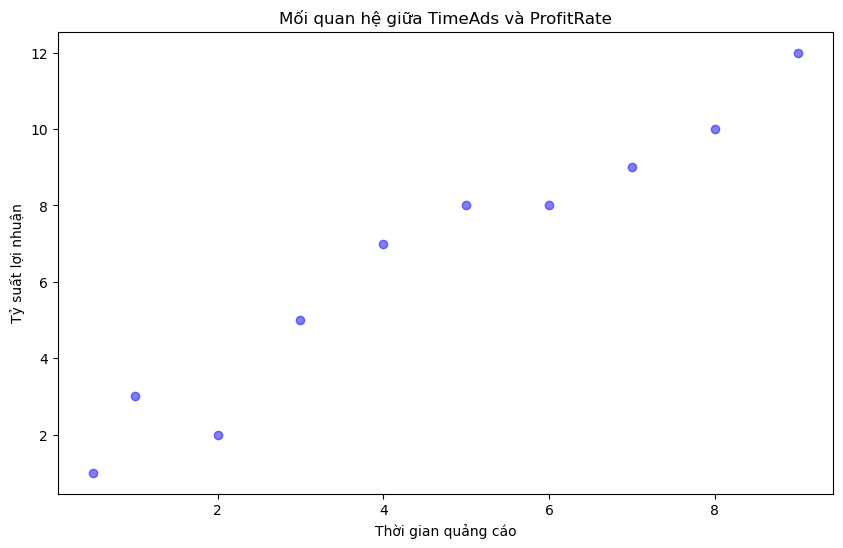

In [ ]:
# 2. Visualize mối quan hệ giữa TimeAds và ProfitRate
plt.figure(figsize=(10,6))
plt.scatter(df['TimeAds'], df['ProfitRate'], color='blue', alpha=0.5)
plt.xlabel('Thời gian quảng cáo')
plt.ylabel('Tỷ suất lợi nhuận')
plt.title('Mối quan hệ giữa TimeAds và ProfitRate')
plt.show()



In [11]:
# 3. Chuẩn bị dữ liệu
X = df[['TimeAds']].values
y = df[['ProfitRate']].values



In [12]:
# 4. Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)



In [13]:
# 5. Xây dựng mô hình
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

#### Phương trình hồi quy 

In [14]:
# 6. In ra các hệ số
print("\nHệ số hồi quy:")
print(f"b₀ (intercept) = {model.intercept_[0]:.4f}")
print(f"b₁ (slope) = {model.coef_[0][0]:.4f}")
print(f"\nPhương trình hồi quy: y = {model.intercept_[0]:.4f} + {model.coef_[0][0]:.4f}X")



Hệ số hồi quy:
b₀ (intercept) = 1.4003
b₁ (slope) = 1.1774

Phương trình hồi quy: y = 1.4003 + 1.1774X


In [15]:

# 7. Dự đoán và đánh giá mô hình
y_pred = model.predict(X_test)

print("\nCác chỉ số đánh giá mô hình:")
print(f"R-squared (R²) = {model.score(X_test, y_test):.4f}")
print(f"Mean Absolute Error (MAE) = {metrics.mean_absolute_error(y_test, y_pred):.4f}")
print(f"Root Mean Squared Error (RMSE) = {np.sqrt(metrics.mean_squared_error(y_test, y_pred)):.4f}")



Các chỉ số đánh giá mô hình:
R-squared (R²) = 0.8828
Mean Absolute Error (MAE) = 1.2873
Root Mean Squared Error (RMSE) = 1.3697


In [21]:
# Tạo DataFrame với các cột yêu cầu
results_df = pd.DataFrame({
    'X_test': X_test.flatten(),      # TimeAds
    'Y_test': y_test.flatten(),      # ProfitRate thực tế
    'y_predict': y_pred.flatten(),   # ProfitRate dự đoán
    'e': (y_test - y_pred).flatten(),# Sai số
    '|e|': abs(y_test - y_pred).flatten() # Giá trị tuyệt đối của sai số
})

# Sắp xếp theo X_test
results_df = results_df.sort_values('X_test')

# Làm tròn các giá trị số đến 4 chữ số thập phân
results_df = results_df.round(4)

# Hiển thị bảng kết quả
print("\nBảng kết quả phân tích:")
print(results_df)

# Thêm hàng tổng cho cột |e|
total_abs_error = results_df['|e|'].sum()
print(f"\nTổng |e|: {total_abs_error:.4f}")

# Nếu muốn lưu bảng ra file Excel
results_df.to_excel('regression_analysis_results.xlsx', index=False)


Bảng kết quả phân tích:
   X_test  Y_test  y_predict       e     |e|
1     2.0       2     3.7551 -1.7551  1.7551
0     8.0      10    10.8195 -0.8195  0.8195

Tổng |e|: 2.5746


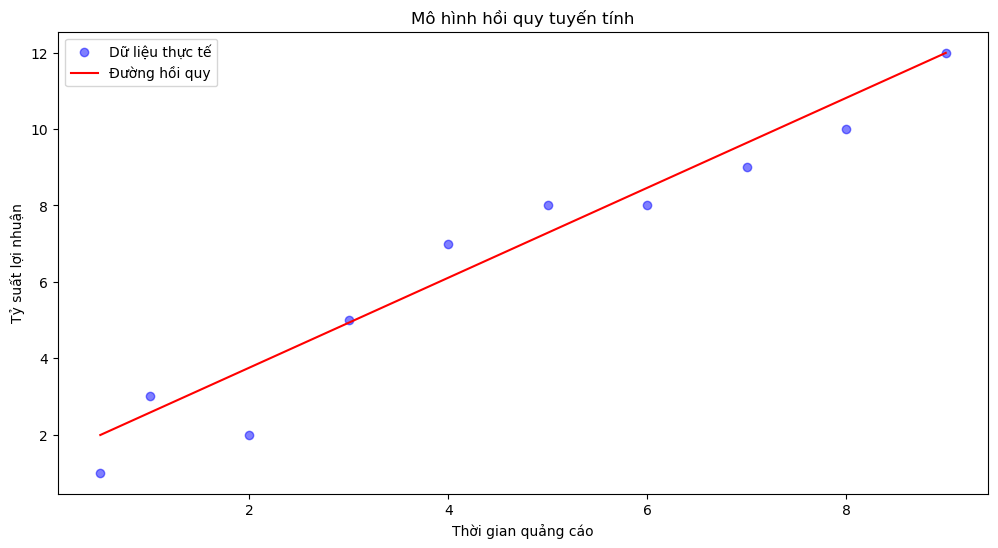

In [ ]:

# 8. Visualize kết quả
plt.figure(figsize=(12,6))

# Plot dữ liệu thực tế
plt.scatter(X, y, color='blue', label='Dữ liệu thực tế', alpha=0.5)

# Plot đường hồi quy
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
y_range = model.predict(X_range)
plt.plot(X_range, y_range, color='red', label='Đường hồi quy')

plt.xlabel('Thời gian quảng cáo')
plt.ylabel('Tỷ suất lợi nhuận')
plt.title('Mô hình hồi quy tuyến tính')
plt.legend()
plt.show()


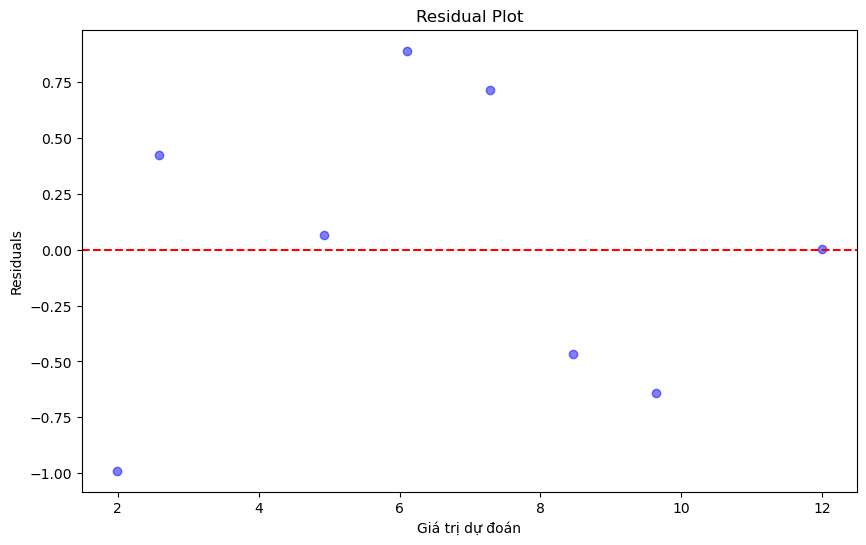

In [17]:

# 9. Vẽ residual plot
y_train_pred = model.predict(X_train)
residuals = y_train - y_train_pred

plt.figure(figsize=(10,6))
plt.scatter(y_train_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Giá trị dự đoán')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [18]:

# 10. Dự đoán giá trị mới
def predict_profit_rate(time_ads):
    return model.predict([[time_ads]])[0][0]

# Ví dụ dự đoán
test_time = 30
predicted_profit = predict_profit_rate(test_time)
print(f"\nVới thời gian quảng cáo {test_time} phút,")
print(f"Dự đoán tỷ suất lợi nhuận là: {predicted_profit:.2f}")


Với thời gian quảng cáo 30 phút,
Dự đoán tỷ suất lợi nhuận là: 36.72
